In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from dython import nominal
%matplotlib inline
sns.set_palette('pastel')

# $$ Exploring Data $$


# Data Loading

In [18]:
response = pd.read_csv('./data/response.csv')
response= response.drop(['id'],axis = 1)
response= response.drop_duplicates()

hotel = pd.read_csv('./data/hotel.csv')
# hotel[['group','brand','city']]=hotel[['group','brand','city']].astype("category")
hotel[['children_policy','pool','parking']]=hotel[['children_policy','pool','parking']].astype(int)

req = pd.read_csv('./data/request.csv')
req = req.drop(['created_at'],axis = 1)
req = req.drop_duplicates()
# req[['language','city']]=req[['language','city']].astype("category")
req['mobile'] = req['mobile'].astype(int)

avatar = pd.read_csv('./data/avatar.csv')

sample = pd.read_csv('./data/sample.csv')
# sample[['language','city']]=sample[['language','city']].astype("category")
sample['mobile'] = sample['mobile'].astype(int)
sample = sample.drop(['scrape_request_id'],axis =1)

In [19]:
df_d = response.join(req.set_index('id'), on='request_id', validate='m:1')
df_d = df_d.join(hotel.drop(['city'],axis=1).set_index('id'), on='hotel_id', validate='m:1')
df_d = df_d[['request_id','avatar_id','date', 'language', 'city','mobile','hotel_id', 'stock', 'group', 'brand', 'parking', 'pool',
       'children_policy', 'price']]
df_d.to_csv("./data/dataset.csv")
df_d.head()

,request_id,avatar_id,date,language,city,mobile,hotel_id,stock,group,brand,parking,pool,children_policy,price
0,11082,9156,10,finnish,madrid,1,860,10,Yin Yang,Ardisson,0,0,0,159
1,11082,9156,10,finnish,madrid,1,633,10,Morriott International,CourtYord,0,0,0,161
2,11082,9156,10,finnish,madrid,1,2,0,Independant,Independant,0,0,0,99
3,11082,9156,10,finnish,madrid,1,108,3,Independant,Independant,0,0,0,104
4,11082,9156,10,finnish,madrid,1,164,10,Yin Yang,Ardisson,1,0,0,158


In [20]:
req.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12315 entries, 0 to 12314
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12315 non-null  int64 
 1   avatar_id  12315 non-null  int64 
 2   language   12315 non-null  object
 3   city       12315 non-null  object
 4   date       12315 non-null  int64 
 5   mobile     12315 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 673.5+ KB


In [21]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               999 non-null    int64 
 1   group            999 non-null    object
 2   brand            999 non-null    object
 3   city             999 non-null    object
 4   parking          999 non-null    int64 
 5   pool             999 non-null    int64 
 6   children_policy  999 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [22]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6644 entries, 0 to 6643
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              6644 non-null   int64 
 1   order_requests  6644 non-null   int64 
 2   avatar_id       6644 non-null   int64 
 3   language        6644 non-null   object
 4   city            6644 non-null   object
 5   date            6644 non-null   int64 
 6   mobile          6644 non-null   int64 
 7   stock           6644 non-null   int64 
 8   hotel_id        6644 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 467.3+ KB


In [23]:
response.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315788 entries, 0 to 1315787
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   request_id  1315788 non-null  int64
 1   hotel_id    1315788 non-null  int64
 2   price       1315788 non-null  int64
 3   stock       1315788 non-null  int64
dtypes: int64(4)
memory usage: 50.2 MB


In [24]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315788 entries, 0 to 1315787
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   request_id       1315788 non-null  int64 
 1   avatar_id        1315788 non-null  int64 
 2   date             1315788 non-null  int64 
 3   language         1315788 non-null  object
 4   city             1315788 non-null  object
 5   mobile           1315788 non-null  int64 
 6   hotel_id         1315788 non-null  int64 
 7   stock            1315788 non-null  int64 
 8   group            1315788 non-null  object
 9   brand            1315788 non-null  object
 10  parking          1315788 non-null  int64 
 11  pool             1315788 non-null  int64 
 12  children_policy  1315788 non-null  int64 
 13  price            1315788 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 150.6+ MB


# Data Exploring

## Correlation heatmap

Firstly, take a look at the correlation heatmap for visualize the strength of relationships between all of the variables

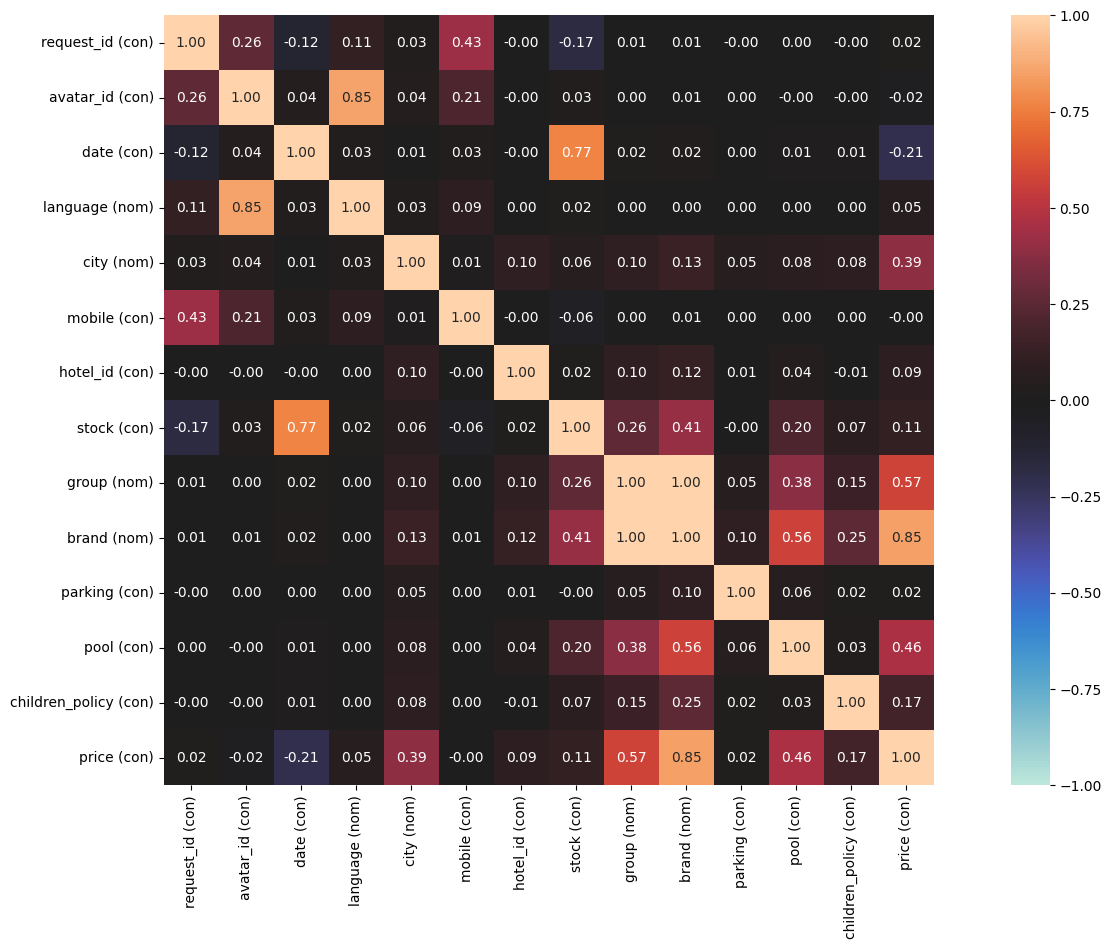

In [25]:
nominal.associations(df_d,figsize=(20,10),mark_columns=True)
plt.show()

From the heatmap, we can indicate some variables that have strong relation toward $price$.

## Exploration of strong impact elements 

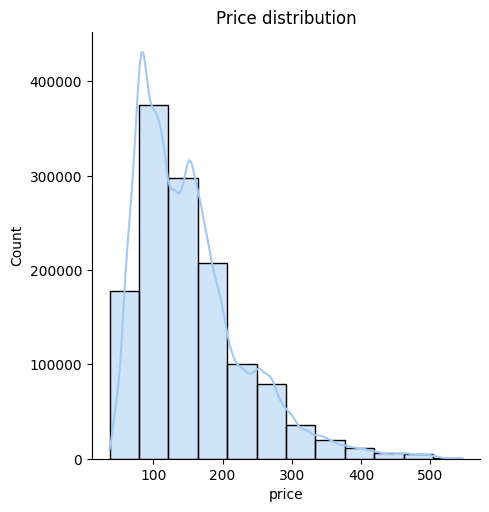

In [26]:
sns.displot(data=response, x="price", bins=12,kde=True)
plt.title("Price distribution")
plt.show()

<AxesSubplot: xlabel='date', ylabel='price'>

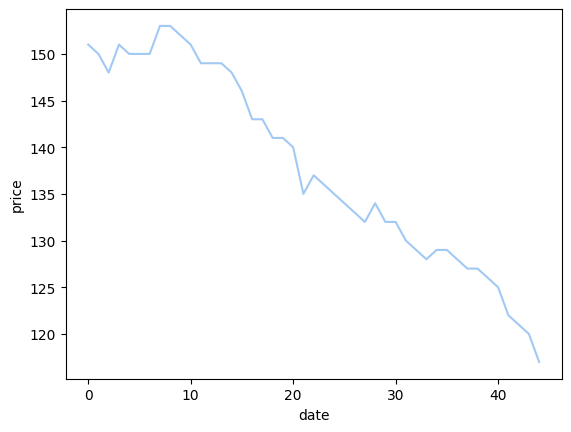

In [27]:
sns.lineplot(pd.DataFrame(df_d.groupby('date')['price'].median()),x='date',y='price')

As we can see, the price drops as expected as the searching time is close to the date.

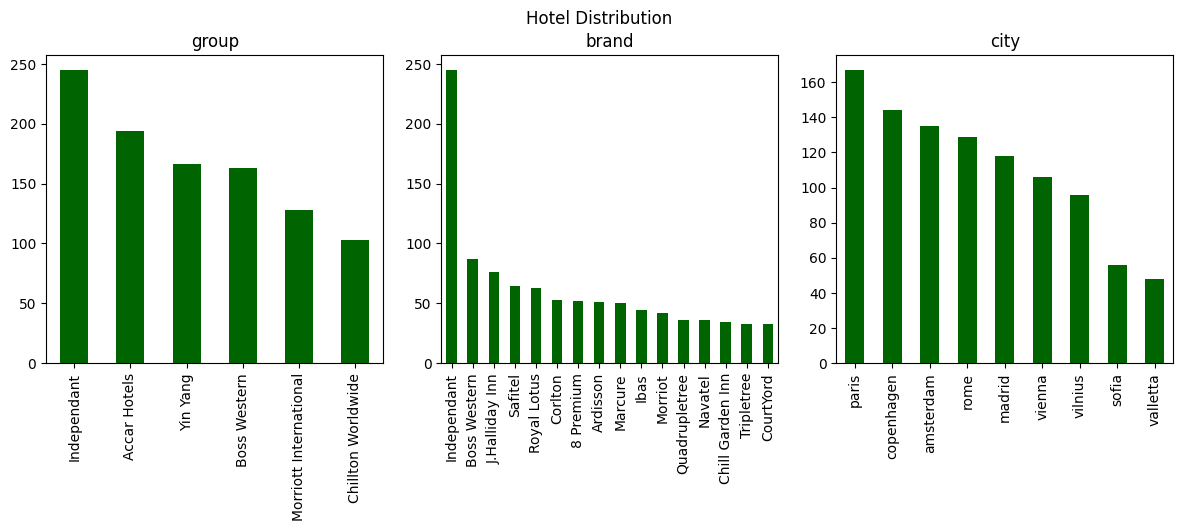

In [28]:
cols = ['group','brand','city']
fig, axs = plt.subplots(1, 3, figsize = (12,4))
fig.suptitle("Hotel Distribution")
fig.tight_layout()
for i,col in enumerate(hotel[cols]):
    hotel[col].value_counts().plot(kind="bar",color='DarkGreen', ax=axs[i]).set_title(col)
plt.show()


We are encoding categorical elements for better visualization of the 3 categorical variables.

In [29]:
cols = ['city','group','brand','language']
for col in cols:
    print(df_d[col].value_counts().index)
    df_d[col].replace(df_d[col].value_counts().index,
                        (np.linspace(1,len(df_d[col].value_counts().index),len(df_d[col].value_counts().index))).astype(int), inplace=True)


Index(['paris', 'copenhagen', 'amsterdam', 'rome', 'madrid', 'vienna',
       'vilnius', 'sofia', 'valletta'],
      dtype='object')
Index(['Independant', 'Accar Hotels', 'Boss Western', 'Yin Yang',
       'Morriott International', 'Chillton Worldwide'],
      dtype='object')
Index(['Independant', 'Boss Western', 'J.Halliday Inn', 'Royal Lotus',
       'Safitel', 'Corlton', 'Marcure', 'Ardisson', '8 Premium', 'Morriot',
       'Ibas', 'Quadrupletree', 'Navatel', 'Chill Garden Inn', 'CourtYord',
       'Tripletree'],
      dtype='object')
Index(['hungarian', 'french', 'finnish', 'austrian', 'estonian', 'bulgarian',
       'danish', 'swedish', 'slovakian', 'romanian', 'irish', 'maltese',
       'italian', 'greek', 'belgian', 'dutch', 'cypriot', 'lithuanian',
       'polish', 'latvian', 'czech', 'luxembourgish', 'german', 'croatian',
       'portuguese', 'slovene', 'spanish'],
      dtype='object')


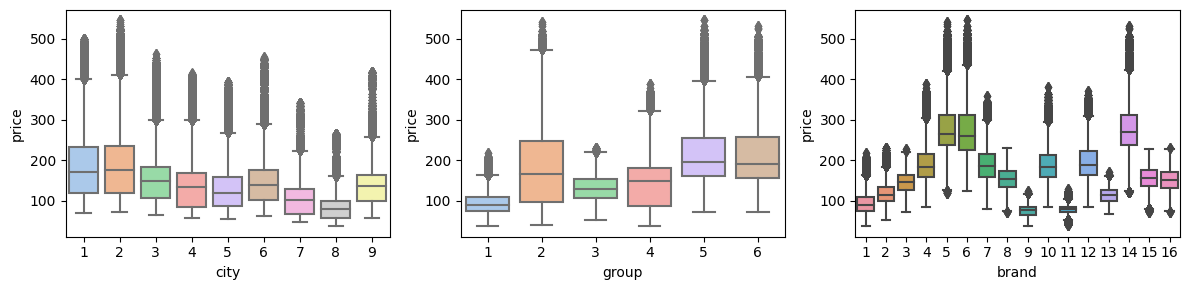

In [30]:
fig, axs = plt.subplots(1, 3, figsize = (12,3))
cols = ['city','group','brand']
for i,col in enumerate(cols):
    sns.boxplot(data=df_d, x=col, y='price',ax=axs[i])
plt.tight_layout()

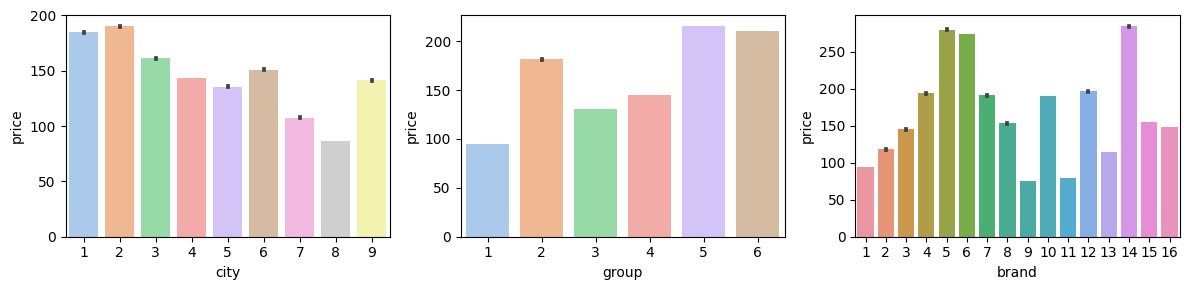

In [31]:
fig, axs = plt.subplots(1, 3, figsize = (12,3))
cols = ['city','group','brand']
for i,col in enumerate(cols):
    sns.barplot(x=df_d[col],y=df_d['price'],ax=axs[i])
plt.tight_layout()

A noticeable impact on the price of hotels with the change of these 3 variables.